In [ ]:
import keras #in the backhand of this, tensorflw works
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator #for image augmentation, import ImageDataGenerator class
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [ ]:
keras.__version__

'2.4.3'

In [ ]:
train_data_path='/content/drive/MyDrive/train'
validation_data_path='/content/drive/MyDrive/validation'

In [ ]:
#now we will generate images since we don't have sufficient images. It is to tain CNN

## Data Preprocessing

In [ ]:
#to generate data from image for training (yahan hum n ye batana hai is different types ki images create karni hn)
training_datagen=ImageDataGenerator(rescale=1./255,    #rescal the dataset
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest') #to create different types of images(data augmentation)

In [ ]:
#creating images using training_datagen (yahan images create karain g)
training_data=training_datagen.flow_from_directory(train_data_path, #picking images from directory and then creating images 
                                     target_size=(150,150), #150 width, 150 height of images with different resolutions
                                     batch_size=32,
                                     class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
#to see classes and its indices in training_datagen
training_data.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
#to get data for validation
valid_datagen=ImageDataGenerator(rescale=1./255) #we will just take available images, not create extra images. Will only rescale

In [ ]:
valid_data=training_datagen.flow_from_directory(validation_data_path, #picking images from directory and then creating images 
                                     target_size=(150,150), #150 width, 150 height of images with different resolutions
                                     batch_size=32,
                                     class_mode='binary')

Found 256 images belonging to 2 classes.


In [ ]:
#now data has been generated

#to see images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
 

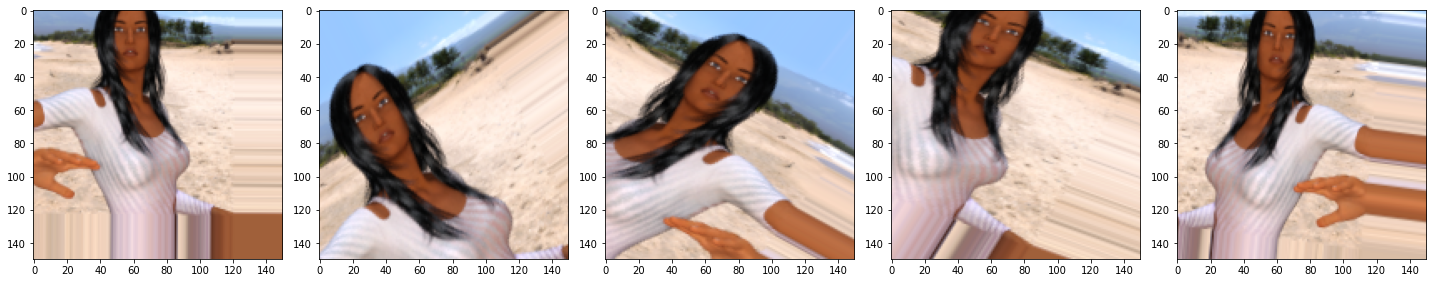

In [ ]:
images = [training_data[0][0][0] for i in range(5)] #to see only 5 images
plotImages(images) 

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3]),
                                    
                                    keras.layers.MaxPooling2D(pool_size=(2,2)), # matrix of 2 by 2
                                      
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                  
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                          
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                   
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                      
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),  
                                                                     
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [ ]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_path = '/content/drive/My Drive/My ML Project /DL Project/CNN/horse-or-human/horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - 686s 21s/step - loss: 0.7092 - accuracy: 0.4978 - val_loss: 0.7008 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/My Drive/My ML Project /DL Project/CNN/horse-or-human/horse_or_human_predictor.h5
Epoch 2/100
33/33 [==============================] - 13s 393ms/step - loss: 0.6715 - accuracy: 0.5859 - val_loss: 0.6227 - val_accuracy: 0.6484

Epoch 00002: val_accuracy improved from 0.50000 to 0.64844, saving model to /content/drive/My Drive/My ML Project /DL Project/CNN/horse-or-human/horse_or_human_predictor.h5
Epoch 3/100
33/33 [==============================] - 13s 395ms/step - loss: 0.5928 - accuracy: 0.6944 - val_loss: 1.3030 - val_accuracy: 0.5156

Epoch 00003: val_accuracy did not improve from 0.64844
Epoch 4/100
33/33 [==============================] - 13s 389ms/step - loss: 0.5405 - accuracy: 0.7550 - val_loss: 0.9334 - val_accuracy: 0.5586

Epoch 00004: val_accura

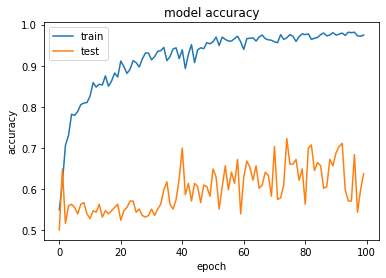

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

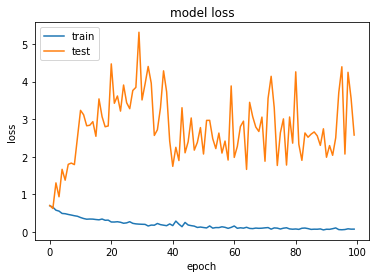

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()